# **Kütüphane Tanımlama**

In [10]:
import pandas as pd # veriler üzerinde işlem yapmayı kolaylaştırır.
import numpy as np # dizilerde ve matematiksel işlemler de hesaplamalar yapmak için kullanılır.

import seaborn as sns # istatistiksel grafikler tasarlamak için kullanılır.
import matplotlib.pyplot as plt # grafikleri Ekranda göstermek için kullanılıyor.

# **Veri Çekme**

In [11]:
data = pd.read_csv("/kaggle/input/innovaai/train.csv") # veri yoluyla csv okuması yapılıp data'ya aktarılıyor.

# **Veri seti tanımlama ve analizi**

In [12]:
data.head(10) # ilk 10 veri gösteriliyor

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28
5,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-13,1.99
6,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-14,0.57
7,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-15,0.35
8,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-16,0.64
9,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-17,0.36


In [13]:
data.dtypes # nitelik tipleri gösteriliyor.

DATETIME     object
SERVER       object
CPU          object
CPULOAD     float64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312696 entries, 0 to 312695
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DATETIME  312696 non-null  object 
 1   SERVER    312696 non-null  object 
 2   CPU       312696 non-null  object 
 3   CPULOAD   312696 non-null  float64
dtypes: float64(1), object(3)
memory usage: 9.5+ MB


In [15]:
data.shape # toplam kayıt sayısı ve nitelik sayısı belirtiliyor.

(312696, 4)

In [16]:
len(data.columns) # özellik sayısı tekrar bastırılıyor.

4

In [17]:
data.describe() # integer ve float degerlerin merkezi egilim ve dagılım ölçüleri

,CPULOAD
count,312696.000000
mean,10.283954
std,9.904820
min,0.060000
25%,2.050000
50%,6.820000
75%,16.040000
max,68.840000


In [18]:
data.corr()                # korelasyonlar hesaplanıyor.

/tmp/ipykernel_28/2639026478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()                # korelasyonlar hesaplanıyor.


,CPULOAD
CPULOAD,1.0


In [19]:
data.cov()                # kovaryanslar hesaplanıyor

/tmp/ipykernel_28/1273156705.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()                # kovaryanslar hesaplanıyor


,CPULOAD
CPULOAD,98.105458


In [20]:
varietyCPU=data['CPU'].unique() # kaç farklı CPU çeşidi oldugu tespit ediliyor.
varietyCPU.size

24

In [21]:
ServerNumber=data['SERVER'].unique() # kaç farklı server oldugu tespit ediliyor.
ServerNumber.size

2

In [22]:
ServerNumber

array(['CIHAZ_301', 'CIHAZ_305'], dtype=object)

In [23]:
data['CPU'].value_counts()

CPU-0     13029
CPU-1     13029
CPU-8     13029
CPU-7     13029
CPU-6     13029
CPU-5     13029
CPU-4     13029
CPU-3     13029
CPU-23    13029
CPU-22    13029
CPU-21    13029
CPU-20    13029
CPU-2     13029
CPU-19    13029
CPU-18    13029
CPU-17    13029
CPU-16    13029
CPU-15    13029
CPU-14    13029
CPU-13    13029
CPU-12    13029
CPU-11    13029
CPU-10    13029
CPU-9     13029
Name: CPU, dtype: int64

In [24]:
data[data.CPULOAD >= 10] # Koşullu eleman işlemleri kullanılarak CPULOAD büyüklüğü 10'dan büyük olanlar adedi ile gösteriliyor.

,DATETIME,SERVER,CPU,CPULOAD
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
12,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-2,15.73
21,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-7,13.98
22,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-8,10.51
24,2020-03-24 00:00:00+03:00,CIHAZ_305,CPU-0,13.32
...,...,...,...,...
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42


# **Veri Görselleştirmesi**

<Axes: xlabel='SERVER', ylabel='Count'>

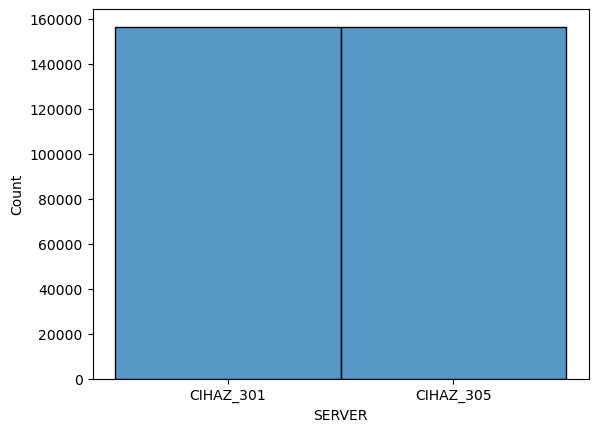

In [25]:
sns.histplot(data=data, x="SERVER", kde=False) # Histogram veri görselleştirme yöntemi kullanılıyor.

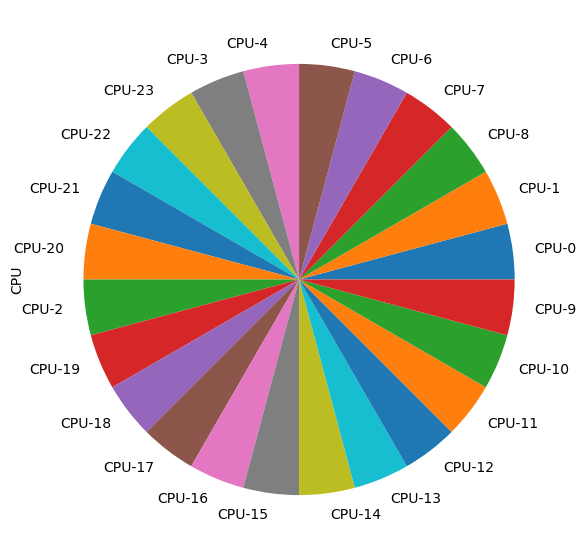

In [26]:
data['CPU'].value_counts().plot.pie(figsize=(7,7))
plt.show()

# **Veri Ön İşleme**

In [27]:
data.isnull().sum() # Eksik veriler tespit ediliyor.

DATETIME    0
SERVER      0
CPU         0
CPULOAD     0
dtype: int64

In [28]:
data.notnull().sum() # eksik olmayan veriler gösteriliyor.

DATETIME    312696
SERVER      312696
CPU         312696
CPULOAD     312696
dtype: int64

In [29]:
data.min() 
# min degerlere bakılarak aykırı deger tespiti yapılıyor.

DATETIME    2020-03-24 00:00:00+03:00
SERVER                      CIHAZ_301
CPU                             CPU-0
CPULOAD                          0.06
dtype: object

In [30]:
data.max() 
# max degerlere bakılarak aykırı deger tespiti yapılıyor.

DATETIME    2020-05-30 23:45:00+03:00
SERVER                      CIHAZ_305
CPU                             CPU-9
CPULOAD                         68.84
dtype: object

# **Veri Türü Dönüştürme**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [32]:
data.dtypes

DATETIME     object
SERVER       object
CPU          object
CPULOAD     float64
dtype: object

In [33]:
label_encoder = LabelEncoder()
# sütunlardaki etiketler dönüştürülüyor. 
data['DATETIME']= label_encoder.fit_transform(data['DATETIME'])
data['SERVER']= label_encoder.fit_transform(data['SERVER'])
data['CPU']= label_encoder.fit_transform(data['CPU'])

In [34]:
data.head(48)

,DATETIME,SERVER,CPU,CPULOAD
0,0,0,0,3.88
1,0,0,1,11.33
2,0,0,2,5.31
3,0,0,3,5.25
4,0,0,4,0.28
5,0,0,5,1.99
6,0,0,6,0.57
7,0,0,7,0.35
8,0,0,8,0.64
9,0,0,9,0.36


In [35]:
# Eğitim verilerini hazırlama
X_train = data.drop(['SERVER', 'CPU', 'CPULOAD'], axis=1)
y_train = data['CPULOAD']

In [36]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor modelini oluşturma ve eğitme

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
dataTest = pd.read_csv("/kaggle/input/innovadata/test.csv") # veri yoluyla csv okuması yapılıp data'ya aktarılıyor.

In [41]:
dataTest.dtypes

index        int64
DATETIME    object
SERVER      object
dtype: object

In [42]:
dataTest.isnull().sum() # Eksik veriler tespit ediliyor.

index       0
DATETIME    0
SERVER      0
dtype: int64

In [44]:
label_encoder = LabelEncoder()
# sütunlardaki etiketler dönüştürülüyor. 
dataTest['DATETIME']= label_encoder.fit_transform(dataTest['DATETIME'])
dataTest['SERVER']= label_encoder.fit_transform(dataTest['SERVER'])

In [46]:
dataTest.head(2000)

,index,DATETIME,SERVER
0,0,0,0
1,1,0,1
2,2,1,0
3,3,1,1
4,4,2,0
...,...,...,...
187,187,93,1
188,188,94,0
189,189,94,1
190,190,95,0


In [47]:
# Test verilerini hazırlama
X_test = dataTest.drop(['index', 'SERVER'], axis=1)

In [48]:
predictions = model.predict(X_test)

In [49]:
# Tahminleri sample_submission formatına dönüştürme
submission = pd.DataFrame({'index': dataTest.index, 'CPULOAD': predictions})

In [50]:
# Tahminleri CSV dosyasına kaydetme
submission.to_csv('submission.csv', index=False)

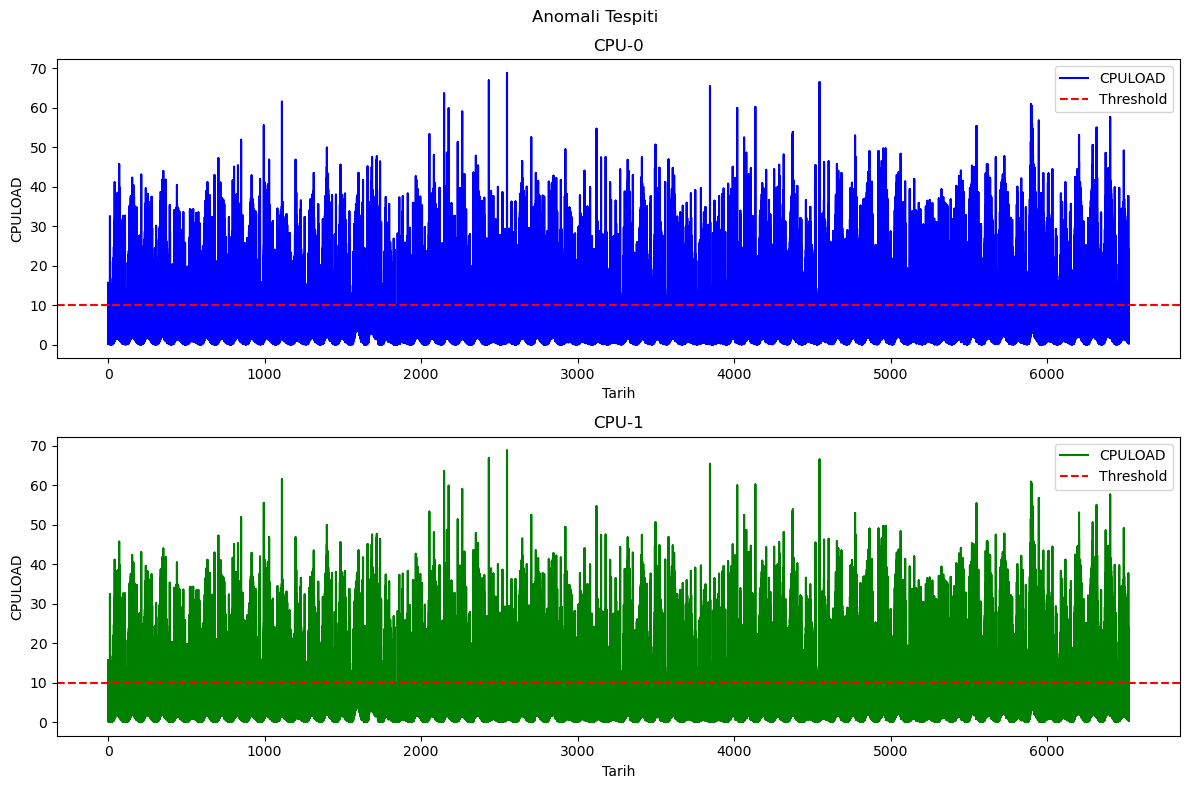

In [55]:
# Anomali tespiti için grafiklerin görselleştirilmesi
fig, axs = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Anomali Tespiti')

# CPU-0 için CPULOAD grafiği
axs[0].plot(data['DATETIME'], data['CPULOAD'], color='blue', label='CPULOAD')
axs[0].axhline(y=10, color='red', linestyle='--', label='Threshold')
axs[0].set_xlabel('Tarih')
axs[0].set_ylabel('CPULOAD')
axs[0].set_title('CPU-0')
axs[0].legend()

# CPU-1 için CPULOAD grafiği
axs[1].plot(data['DATETIME'], data['CPULOAD'], color='green', label='CPULOAD')
axs[1].axhline(y=10, color='red', linestyle='--', label='Threshold')
axs[1].set_xlabel('Tarih')
axs[1].set_ylabel('CPULOAD')
axs[1].set_title('CPU-1')
axs[1].legend()

plt.tight_layout()
plt.show()